# Task - 2


## **Task has been mentioned at the end of this notebook**  

Read this notebook to understand the solutions to `Task - 1`



## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv(r"C:\Users\Lenovo\classfiles\Machine learning\train.csv")
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [5]:
df.isna().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

## 2. Cleaning the Data

In [6]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean(), inplace = True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace = True) 
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)
print(df.isnull().sum())

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int


df['Holding_Policy_Duration'].value_counts()

14+    4952
1       867
2       790
3       696
4       530
5       461
6       374
7       320
8       254
9       205
10      166
12      104
13      103
14       89
11       89
Name: Holding_Policy_Duration, dtype: int64

In [8]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],'14-')
df['Holding_Policy_Duration'].value_counts()

14-    5048
14+    4952
Name: Holding_Policy_Duration, dtype: int64

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['Holding_Policy_Duration'] = label_encoder.fit_transform(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].unique()

array([0, 1])

In [10]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No

print(df['Accomodation_Type'].head())
print(df['Reco_Insurance_Type'].head())
print(df['Is_Spouse'].head())

0     Owned
1     Owned
2    Rented
3    Rented
4     Owned
Name: Accomodation_Type, dtype: object
0    Individual
1    Individual
2    Individual
3    Individual
4         Joint
Name: Reco_Insurance_Type, dtype: object
0     No
1     No
2     No
3     No
4    Yes
Name: Is_Spouse, dtype: object


In [11]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


%timeit
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:0 if x=='No' else 1)



In [12]:
%timeit
df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:0 if x=='Rented' else 1)
df['Accomodation_Type']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    1
9998    0
9999    1
Name: Accomodation_Type, Length: 10000, dtype: int64

In [13]:
%timeit
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:0 if x=='Joint' else 1)
df['Reco_Insurance_Type']

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: Reco_Insurance_Type, Length: 10000, dtype: int64

In [14]:
# Now again having a look at all those columns to see if everything went well

df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [15]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int32  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [16]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df['City_Code'].unique()

array(['C3', 'C1', 'C26', 'C2', 'C17', 'C4', 'C16', 'C9', 'C23', 'C21',
       'C6', 'C7', 'C11', 'C22', 'C15', 'C13', 'C8', 'C35', 'C29', 'C33',
       'C10', 'C12', 'C19', 'C5', 'C18', 'C14', 'C24', 'C27', 'C20',
       'C34', 'C36', 'C25', 'C28', 'C32', 'C30', 'C31'], dtype=object)

In [17]:
df['Health Indicator'].unique()

array(['X1', 'X6', 'X4', 'X2', 'X3', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [18]:
# You can also do this to separate Object columns

df_categorical=df.select_dtypes(include='object')
df_categorical

,City_Code,Health Indicator
0,C3,X1
1,C3,X6
2,C1,X1
3,C26,X1
4,C2,X1
...,...,...
9995,C3,X5
9996,C5,X1
9997,C1,X1
9998,C1,X5


In [19]:
# Lets just try to see what is happening Response. Check the output.
df['Response'].unique()

array([0, 1], dtype=int64)

In [20]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape

df=df.drop(['Unnamed: 0'], axis=1)
df.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [21]:
df.shape

(10000, 14)

In [22]:
# Getting all the Object Dtypes

print(df_categorical)
print(df_categorical.dtypes)
print(df_categorical.shape)

     City_Code Health Indicator
0           C3               X1
1           C3               X6
2           C1               X1
3          C26               X1
4           C2               X1
...        ...              ...
9995        C3               X5
9996        C5               X1
9997        C1               X1
9998        C1               X5
9999        C7               X2

[10000 rows x 2 columns]
City_Code           object
Health Indicator    object
dtype: object
(10000, 2)


In [23]:
df_numerical=df.select_dtypes(include='number')
print(df_numerical.head())
print(df_numerical.shape)

      ID  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  \
0  27386           64                  1                    1         36   
1  33500         2955                  1                    1         66   
2   7998         1542                  0                    1         24   
3  33033          772                  0                    1         75   
4  30517         1510                  1                    0         59   

   Lower_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  \
0         36          0                        0                  2.0   
1         66          0                        1                  1.0   
2         24          0                        1                  1.0   
3         75          0                        1                  3.0   
4         58          1                        0                  4.0   

   Reco_Policy_Cat  Reco_Policy_Premium  Response  
0               16              13320.0         0  


In [24]:
df_final=pd.concat([df_numerical,df_categorical],axis=1)
df_final.head()

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator
0,27386,64,1,1,36,36,0,0,2.0,16,13320.0,0,C3,X1
1,33500,2955,1,1,66,66,0,1,1.0,19,16152.0,0,C3,X6
2,7998,1542,0,1,24,24,0,1,1.0,16,7310.0,0,C1,X1
3,33033,772,0,1,75,75,0,1,3.0,16,15792.0,0,C26,X1
4,30517,1510,1,0,59,58,1,0,4.0,17,23673.0,0,C2,X1


In [25]:
# Drop all the unwanted columns.


## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

### City Code
#### Lets see the number of cities and see how many customers are there

In [26]:
print(df_final['City_Code'].head())
print(df_final['City_Code'].value_counts())

0     C3
1     C3
2     C1
3    C26
4     C2
Name: City_Code, dtype: object
C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C30      12
C36      12
C31       4
C35       3
Name: City_Code, dtype: int64


<AxesSubplot:xlabel='City_Code', ylabel='count'>

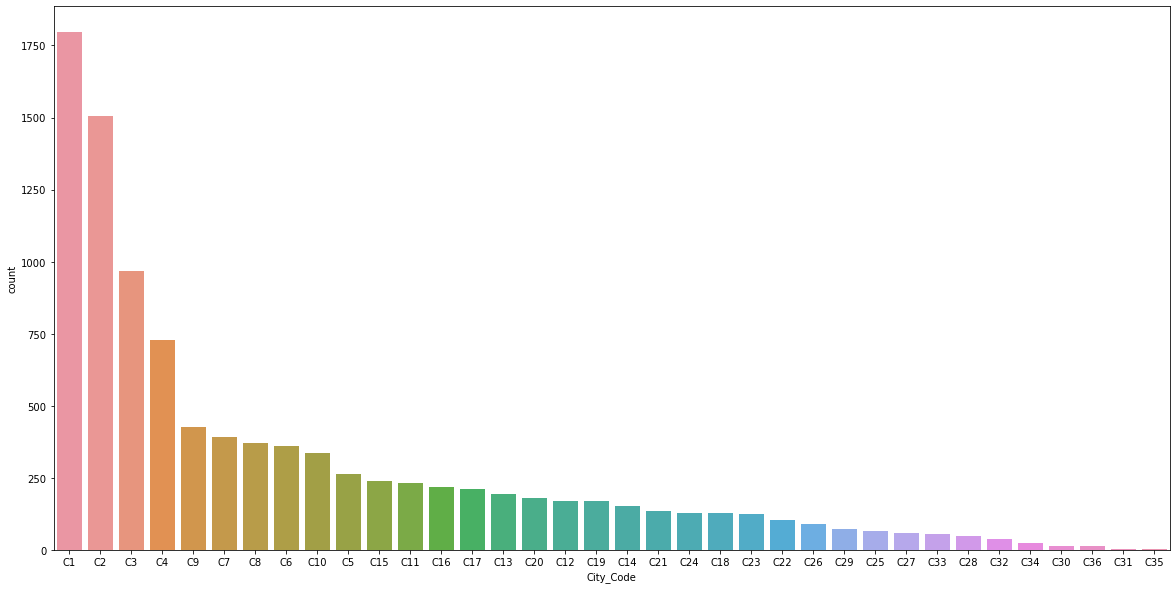

In [27]:
a4_dims=(20,10)

fig,ax=plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,data=df_final,x='City_Code',order=df_final['City_Code'].value_counts().index)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


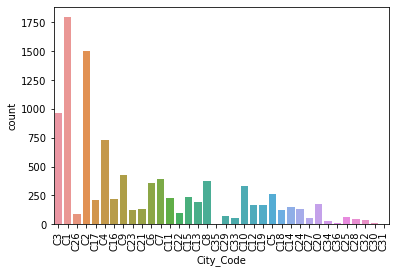

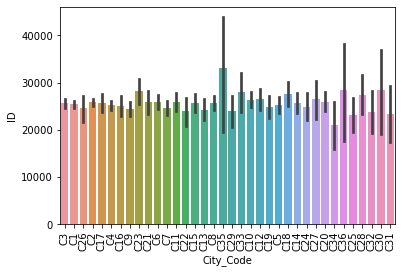

In [28]:
sns.countplot(df_final.City_Code)
plt.xticks(rotation=90)
plt.show()

sns.barplot(y = 'ID', x= 'City_Code' , data = df_final )
plt.xticks(rotation=90)
plt.show()

#### Let's see city-wise customers interests in recommended policy

In [29]:
df_final[['City_Code','Reco_Policy_Cat']]

,City_Code,Reco_Policy_Cat
0,C3,16
1,C3,19
2,C1,16
3,C26,16
4,C2,17
...,...,...
9995,C3,19
9996,C5,4
9997,C1,19
9998,C1,13


### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [30]:
df_final['Region_Code'].value_counts()

1       23
6       18
4       18
7       17
30      15
        ..
2747     1
733      1
714      1
2764     1
6147     1
Name: Region_Code, Length: 3726, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

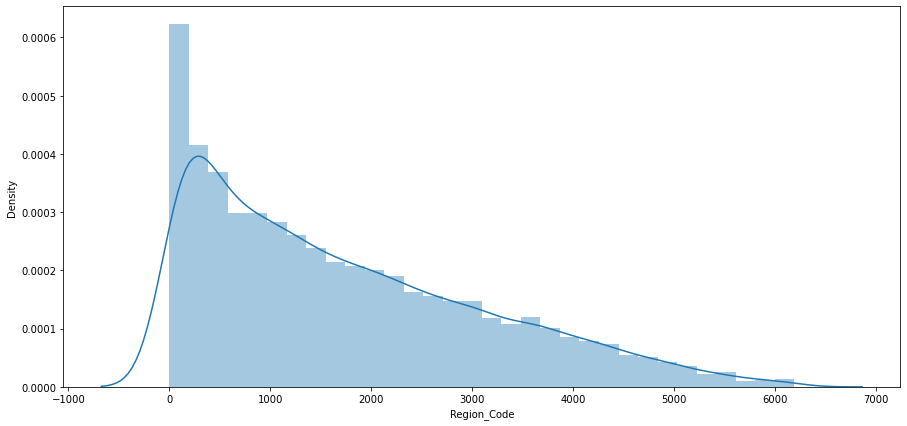

In [31]:
plt.figure(figsize=(15, 7))
sns.distplot(df_final.Region_Code )

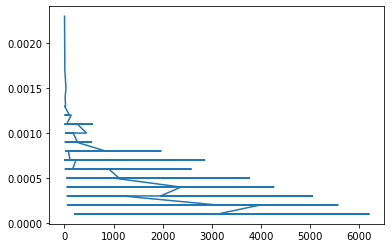

In [32]:
df_final.Region_Code.value_counts(normalize=True).plot.line()
plt.show()

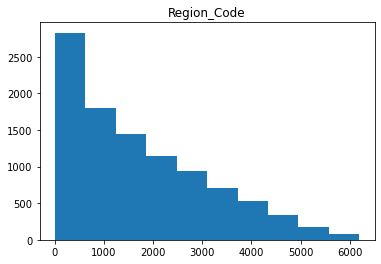

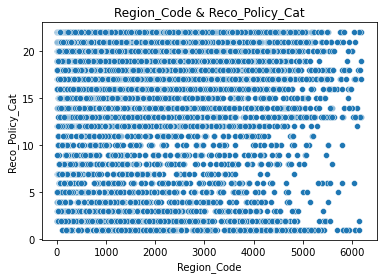

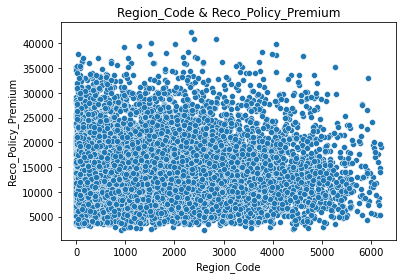

In [33]:
plt.hist(df_final.Region_Code)
plt.title('Region_Code')
plt.show()

sns.scatterplot(x = 'Region_Code', y= 'Reco_Policy_Cat' , data = df_final )
plt.title('Region_Code & Reco_Policy_Cat')
plt.show()

sns.scatterplot(x = 'Region_Code', y= 'Reco_Policy_Premium' , data = df_final )
plt.title('Region_Code & Reco_Policy_Premium')
plt.show()

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


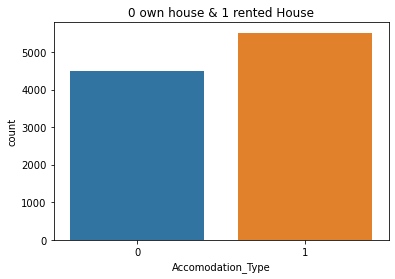

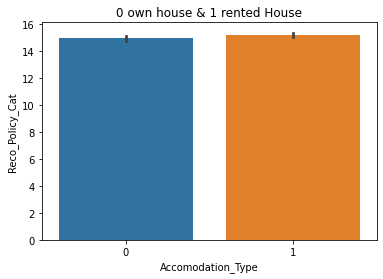

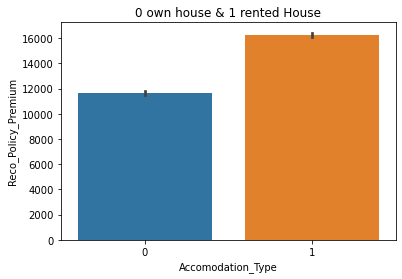

In [35]:
sns.countplot(df.Accomodation_Type)
plt.title('0 own house & 1 rented House')
plt.show()

sns.barplot(x = 'Accomodation_Type', y= 'Reco_Policy_Cat' , data = df_final )
plt.title('0 own house & 1 rented House')
plt.show()

sns.barplot(x = 'Accomodation_Type', y= 'Reco_Policy_Premium' , data = df_final )
plt.title('0 own house & 1 rented House')
plt.show()

#### Let's see the city-wise accomodation type and customer response

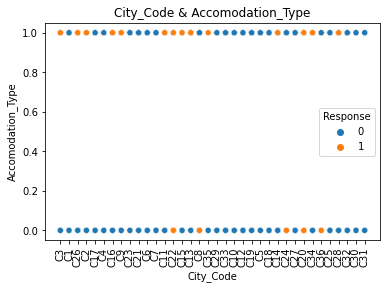

In [36]:
sns.scatterplot(y = 'Accomodation_Type', x= 'City_Code' , data = df_final , hue = 'Response')
plt.title('City_Code & Accomodation_Type')
plt.xticks(rotation=90)
plt.show()

#sns.barplot(y = 'Response', x= 'City_Code' , data = df )
#plt.title('City_Code & Response')
#plt.xticks(rotation=90)
#plt.show()

### Reco Insurance Type
#### Let's see the various recommended insurance types and customer response to them.

In [37]:
df_final['Reco_Insurance_Type'].value_counts()

1    7956
0    2044
Name: Reco_Insurance_Type, dtype: int64

<AxesSubplot:>

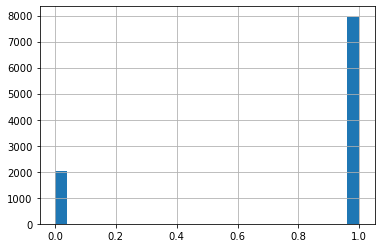

In [38]:
df_final['Reco_Insurance_Type'].hist(bins=25)

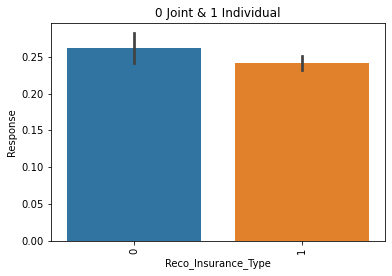

In [39]:
sns.barplot(y = 'Response', x= 'Reco_Insurance_Type' , data = df )
plt.title('0 Joint & 1 Individual')
plt.xticks(rotation=90)
plt.show()


#### Let's see customers accommodation, recommended insurance type and customer responses.

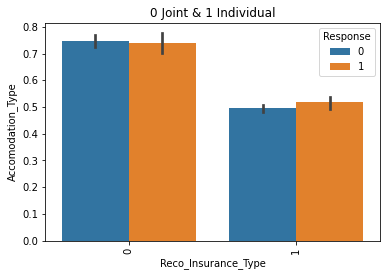

In [40]:
#dhue=response x=acco,y=reco_insu

sns.barplot(y = 'Accomodation_Type', x= 'Reco_Insurance_Type' , data = df_final , hue = 'Response')
plt.title('0 Joint & 1 Individual')
plt.xticks(rotation=90)
plt.show()


#sns.barplot(y = 'Accomodation_Type', x= 'Response' , data = df )

#plt.xticks(rotation=90)
#plt.show()


### Recommended Policy Category
#### Let's see how many categories under the type of recommended policies.

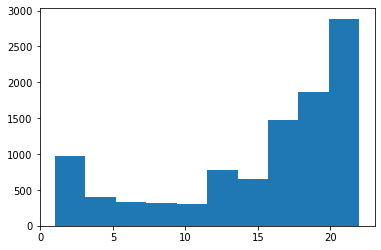

In [41]:
#count ecommended Policy Category

#a4_dims=(20,10)

#fig,ax=plt.subplots(figsize=a4_dims)
#sns.countplot(ax=ax,data=df_final,x='City_Code',order=df_final['City_Code'].value_counts().index)

plt.hist(df_final.Reco_Policy_Cat)
plt.show()

### Recommended Policy Premium
#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.


In [42]:
corr_1=df_final[['Reco_Policy_Premium','Reco_Policy_Cat']].corr()
corr_1

,Reco_Policy_Premium,Reco_Policy_Cat
Reco_Policy_Premium,1.000000,0.054974
Reco_Policy_Cat,0.054974,1.000000


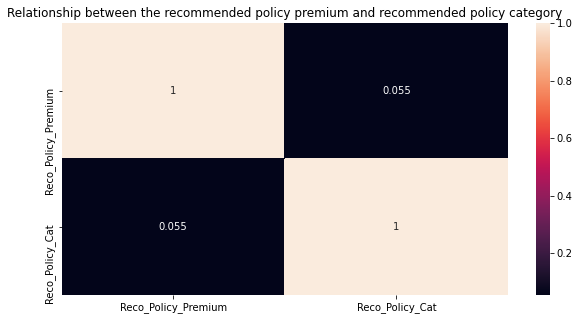

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_1,annot=True)
plt.title("Relationship between the recommended policy premium and recommended policy category")
plt.show()

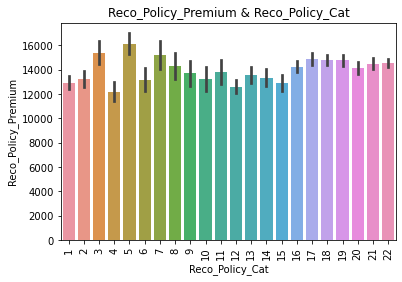

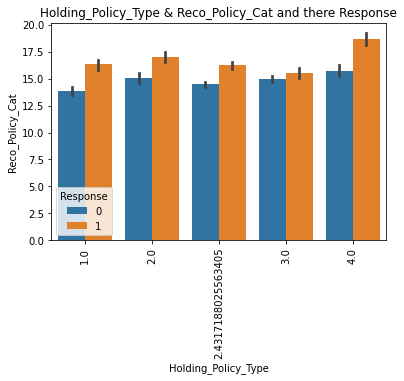

In [44]:


sns.barplot(y = 'Reco_Policy_Premium', x= 'Reco_Policy_Cat' , data = df_final )
plt.title('Reco_Policy_Premium & Reco_Policy_Cat')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Holding_Policy_Type', y= 'Reco_Policy_Cat' , data = df_final, hue = 'Response')
plt.title('Holding_Policy_Type & Reco_Policy_Cat and there Response')
plt.xticks(rotation=90)
plt.show()


#### Let's see which type of recommnded policy has more number of customers

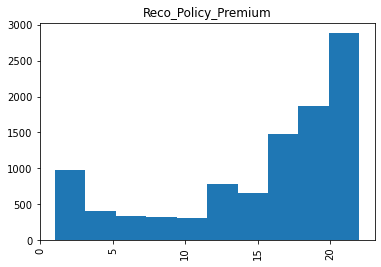

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


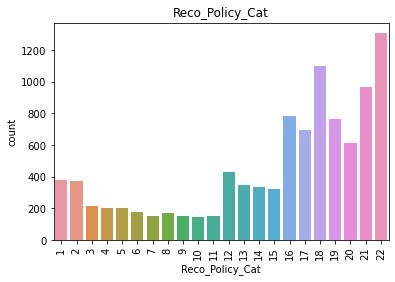

In [45]:
#a4_dims=(20,10)

#fig,ax=plt.subplots(figsize=a4_dims)
#sns.countplot(ax=ax,data=df_final,x='City_Code',order=df_final['City_Code'].value_counts().index)

plt.hist(df_final['Reco_Policy_Cat'])
plt.title('Reco_Policy_Premium')
plt.xticks(rotation=90)
plt.show()

sns.countplot(df_final['Reco_Policy_Cat'])
plt.title('Reco_Policy_Cat')
plt.xticks(rotation=90)
plt.show()


#### Let's see city-wise recommended insurance types to customers and theirresponses to recommended policy.


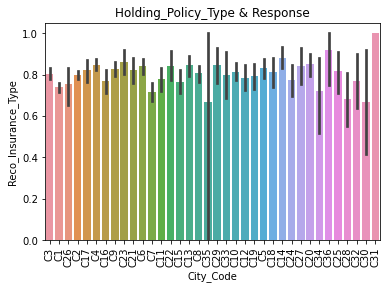

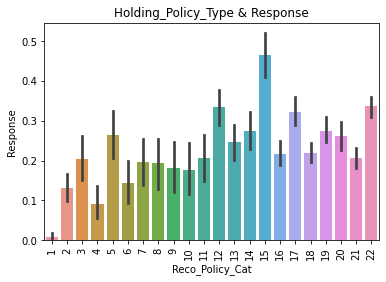

In [46]:
#city code,reco_insu,response

sns.barplot(x = 'City_Code', y= 'Reco_Insurance_Type' , data = df_final )
plt.title('Holding_Policy_Type & Response')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Reco_Policy_Cat', y= 'Response' , data = df_final)
plt.title('Holding_Policy_Type & Response')
plt.xticks(rotation=90)
plt.show()


#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.


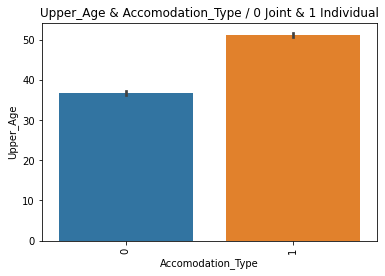

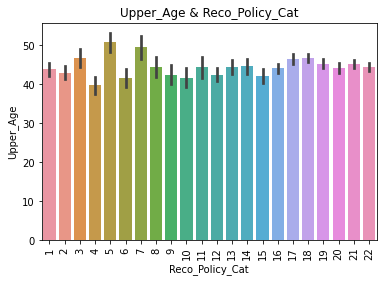

In [47]:


sns.barplot(y = 'Upper_Age', x= 'Accomodation_Type' , data = df_final )
plt.title('Upper_Age & Accomodation_Type / 0 Joint & 1 Individual')
plt.xticks(rotation=90)
plt.show()

sns.barplot(y = 'Upper_Age', x= 'Reco_Policy_Cat' , data = df_final )
plt.title('Upper_Age & Reco_Policy_Cat')
plt.xticks(rotation=90)
plt.show()

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.


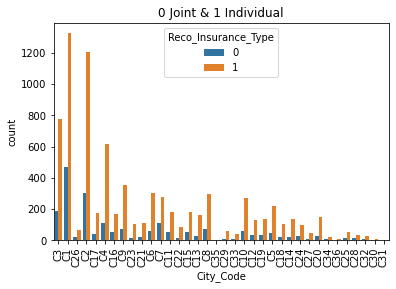

In [48]:


sns.countplot(x = 'City_Code', data = df_final , hue= 'Reco_Insurance_Type' )
plt.title('0 Joint & 1 Individual')
plt.xticks(rotation=90)
plt.show()
